In [83]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Plot
- |u(t)$\mp \sqrt{C}$| if $C>0$ and costant
- |u(t)| otherwise
We make this choice because, in the long time, $u(t)$ must converge to that value (unless C = 0 and it oscillates around that value).

In [84]:
dir_save = ".saves/" + "checking exponential decay when C positive/" 

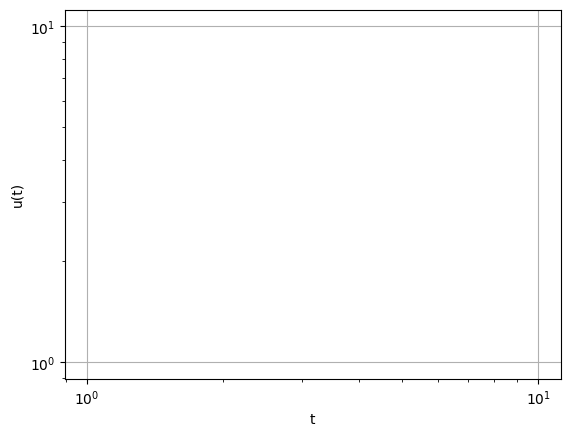

In [85]:
# Create plot object
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_xlabel("t")
ax.set_ylabel("u(t)")
ax.set_yscale("log")
ax.grid()

In [86]:
lastt = 20000  # Last time to plot

In [87]:
# Get all the simulations in the selected folder
for folder in os.scandir(dir_save):
    dir = folder.path
    print(dir)
    # Retrieve evolution parameters
    f = open(dir + "/tdgl_result.dat", "r")
    first_line = f.readline().strip('\n')
    N, tmax, dx, dt, seed, A, Thalf = first_line.split(" ")
    ax.set_title("|u(t)$\mp \sqrt{C}$| if C>0 cost or |u(t)|\n" + "N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n $C(t)=A\sin(2\pi t/T)$ or costant")
    # Get <u(nT)> (SPACE average at times t=nT)
    f = open(dir + "/fileAveout.dat", "r")
    i = 0

    T = 2*float(Thalf)   # Period of C(t)

    veclen = int(float(tmax)/float(dt)) + 1
    tt = np.zeros(veclen)
    uu = np.zeros(veclen)
    for row in f:
        x, y = row.split(" ")
        # Select only times t = nT where T is the period
        tt[i] = float(x)
        uu[i] = float(y)
        if float(A) > 0 and T < 0:
            if uu[0] > 0:
                uu[i] = np.abs(float(y) - np.sqrt(float(A)))    # Plot |u(t) - sqrt(C)| with C = 1
            else:
                uu[i] = np.abs(float(y) + np.sqrt(float(A)))
        else:
            uu[i] = np.abs(float(y))
        i = i + 1
    
    imax = int(float(lastt)/float(dt))
    label = "dt = " + str(dt) 
    if float(T) > 0:
        label = label + "; T = " + str(T) + "; A = " + str(A)
    else:
        label = label + "; C = " + str(A) + " cost"
    ax.plot(tt[0:imax],uu[0:imax],label=label)  # We remove 1/u0^2 to have a power law behaviour from t=0 (otherwise it gets so only when the power law gets more important than the added)
    ax.legend()

.saves/checking exponential decay when C positive/1707906894578


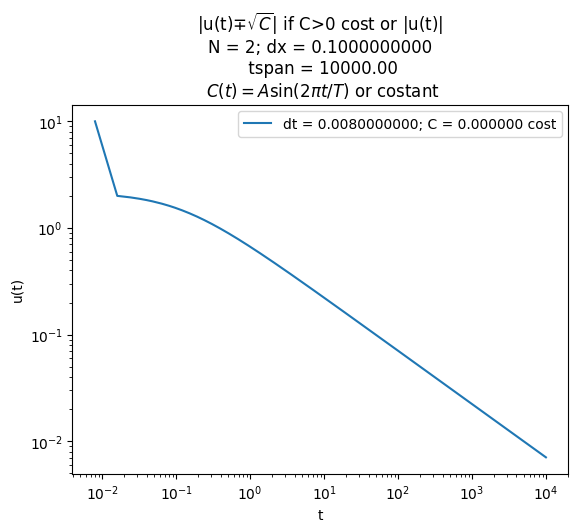

In [88]:
ax.legend()
ax.grid()

fig